breinbaas | revisie 2 | 01-12-2020 

# Opdrachten - Numpy en Pandas

In dit notebook gaan we aan de slag met de numpy en pandas modules. Probeer de vragen zoveel mogelijk zelf te beantwoorden maar kom je er echt niet uit vraag dan een mede cursist of de leraar of bekijk het antwoord op dit notebook.

## 1 Numpy

#### 1.1 initialisatie en indexing

In [1]:
import numpy as np

Creeer een matrix in de vorm;

\begin{vmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{vmatrix}

In [2]:
m = np.array([[1,2,3],[4,5,6]])

Print de eerste rij (1,2,3)

In [3]:
m[0]

array([1, 2, 3])

Print de tweede kolom (2,5)

In [4]:
m[:,1]

array([2, 5])

Print de waarde in de tweede rij en derde kolom

In [5]:
m[1,2]

6

Vermenigvuldig alle waarden van m met 2

\begin{vmatrix}
2 & 4 & 6 \\
8 & 10 & 12
\end{vmatrix}

In [6]:
m *= 2
m

array([[ 2,  4,  6],
       [ 8, 10, 12]])

Bepaal de maximum waarde per kolom

In [7]:
np.max(m, axis=0)

array([ 8, 10, 12])

Gebruik een filter om alle waarden >= 10 op -1 te zetten

In [8]:
m[m>=10]=-1
print(m)

[[ 2  4  6]
 [ 8 -1 -1]]


Gebruik de functiebeschrijving op 

https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html

om je huidige matrix naar een csv bestand te schrijven.

In [9]:
np.savetxt('m.csv', m)

en zoek op internet een functie binnen numpy om het gegenereerde csv bestand in te lezen

In [10]:
m = np.loadtxt('m.csv')

In [11]:
m

array([[ 2.,  4.,  6.],
       [ 8., -1., -1.]])

### 1.2 Praktijk voorbeeld

In de map data staat een bestand genaamd iris.csv. Dit bestand is uitermate populair om de beginselen van statistiek en machine learning uit te leggen. We gaan daar niet zo diep op in maar als je geinteresseerd bent zal een iris machine learning zoektocht op Google je heel veel interessant leesvoer opleveren.

In ieder geval bevat het csv bestand de volgende informatie (en vergeef me mijn gebrek aan plantenkennis);

* lengte en breedte van de 'sepal'
* lengte en breedte van de 'petal' 
* welk type iris dit is (het kunnen er 3 zijn en is hier opgeslagen als type 1, 2 en 3)

![iris](img/iris.png)

#### inlezen en data verkenning

Gebruik de kennis van het inlezen van je eigen matrix om het bestand iris.csv in te lezen. Belangrijk zijn de parameters **skiprows** om de header over te slaan en **delimiter** om aan te geven hoe het cvs bestand de waarden heeft gescheiden.

In [12]:
bdata = np.loadtxt('data/iris.csv', skiprows=1, delimiter=',')

Bepaal de grootste sepal lengte (moet 7.9 zijn)

In [13]:
np.max(bdata[:,0])

7.9

Bepaal de gemiddelde petal breedte (moet (ongeveer) 1.20 zijn) 

In [14]:
np.mean(bdata[:,3])

1.1993333333333336

Bepaal de standaardafwijking van de petal breedte moet ongeveer 0.76 zijn)

In [15]:
np.std(bdata[:,3]) 

0.7596926279021594

#### selectie

Maak een matrix m1 waarbij je enkel naar de waarden kijkt waarbij variety (laatste kolom) gelijk is aan 1

In [16]:
m1 = bdata[bdata[:,-1]==1]

De shape eigenschap geeft je het aantal rijen en kolommen terug. Bepaal hoeveel rijen er in m1 aanwezig zijn.

In [17]:
m1.shape[0]

50

Maak met de voorgaande kennis een analyse waarbij je per type (variety) het gemiddelde van alle 4 de parameters (sepal.length, sepal.widht, petal.length, petal.width) bepaalt.

De verwachten uitkomsten zijn;

\begin{vmatrix}
variety & sepal.length & sepal.widht & petal.length & petal.width \\
1 & 5.006 & 3.428 & 1.462 & 0.246 \\
2& 5.936 & 2.77 & 4.26 & 1.326 \\
3 & 6.588 & 2.974 & 5.552 & 2.026
\end{vmatrix}

In [18]:
for t in [1,2,3]:
    selectie = bdata[bdata[:,-1]==t]
    print(np.mean(selectie[:,:-1], axis=0))

[5.006 3.428 1.462 0.246]
[5.936 2.77  4.26  1.326]
[6.588 2.974 5.552 2.026]


#### plotten van numpy data

Gegevens visualiseren is een intuitieve manier om snel inzicht in je data te krijgen. We gaan aan de slag om de data die we tot nu toe als getallen voorbij zagen komen visueel inzichtelijk te maken. Allereerst importeren we de basis plotting library van Python;

In [19]:
import matplotlib.pyplot as plt

De documentatie van matplotlib kan verwarrend zijn maar probeer desondanks via 

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

een scatterplot te maken van de sepal.length tegen de sepal.width voor alle types.

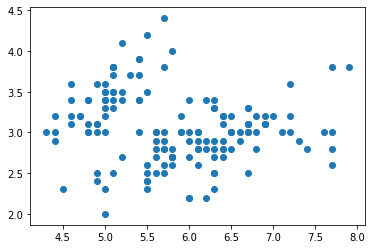

In [20]:
plt.scatter(x=bdata[:,0],y=bdata[:,1])

Deze grafiek is leuk maar niet heel inzichtelijk. We kunnen beter kijken of we de data in een histogram kunnen plotten. Laten eens kijken naar de verdeling van de sepal.lenght. Gebruik hiervoor de volgende functie;

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

**Let op**; als je er niet via de matplotlib beschrijving uitkomt probeer dan eens via de zoekmachine code te vinden op bv. stackoverflow.

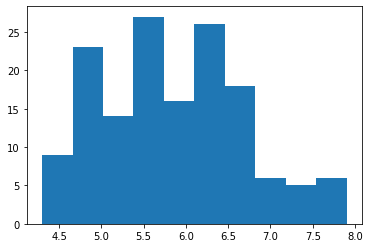

In [21]:
plt.hist(bdata[:,0]);

Je kunt meerdere grafieken achter elkaar plotten door bv.

<pre>
plt.hist(dataset1, label="dataset 1")
plt.hist(dataset2, label="dataset 2")
plt.legend()
</pre>

te gebruiken.

Kun je met deze informatie een grafiek maken die per type de histogram kan maken? Het eindresultaat moet hier op lijken;

![hist](img/irishist.png)

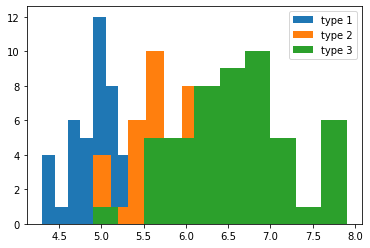

In [22]:
for t in [1,2,3]:
    selectie = bdata[bdata[:,-1]==t]
    plt.hist(selectie[:,0], label="type %d" % t)
plt.legend();

## 3. Pandas

Wellicht is het je opgevallen dat het lastig wordt als je al die indexen moet onthouden.. wat was ook alweer de kolom van de petal.length of van de variety?? Daarnaast zijn er voor veel zaken best wat code regels nodig om het resultaat te krijgen. Pandas maakt dat een stuk inzichtelijker en eenvoudiger.

### 3.1 data inlezen

Gebruik de read_csv functie volgens;

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

om het bestand iris.csv opnieuw in te lezen en het Dataframe op te slaan in een variabele genaamd df.

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('data/iris.csv')

Je kunt de head(n) functie gebruiken om vanaf boven de eerste n regels weer te geven. Gebruik die functie om de eerste 10 regels te laten zien.

In [25]:
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


Gebruik de describe() functie van het DataFrame om inzicht te krijgen in de waarden.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [26]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


#### Indexing

Print de kolom met de waarden voor sepal.length

In [27]:
df['sepal.length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

Print de eerste 10 waarden van de petal.width kolom

In [28]:
df['petal.width'][:10]

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
5    0.4
6    0.3
7    0.2
8    0.2
9    0.1
Name: petal.width, dtype: float64

Print de eerste 10 waarden van de kolommen sepal.width en petal.width

In [29]:
df[['sepal.width','petal.width']][:10]

,sepal.width,petal.width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
5,3.9,0.4
6,3.4,0.3
7,3.4,0.2
8,2.9,0.2
9,3.1,0.1


Print de rijen 40 tot 50 uit het Dataframe

In [30]:
df.iloc[40:50]

,sepal.length,sepal.width,petal.length,petal.width,variety
40,5.0,3.5,1.3,0.3,1
41,4.5,2.3,1.3,0.3,1
42,4.4,3.2,1.3,0.2,1
43,5.0,3.5,1.6,0.6,1
44,5.1,3.8,1.9,0.4,1
45,4.8,3.0,1.4,0.3,1
46,5.1,3.8,1.6,0.2,1
47,4.6,3.2,1.4,0.2,1
48,5.3,3.7,1.5,0.2,1
49,5.0,3.3,1.4,0.2,1


Print enkel de kolommen sepal.width en petal.width van rijen 40 tot 50

In [31]:
df.iloc[40:50][['sepal.width','petal.width']]

,sepal.width,petal.width
40,3.5,0.3
41,2.3,0.3
42,3.2,0.2
43,3.5,0.6
44,3.8,0.4
45,3.0,0.3
46,3.8,0.2
47,3.2,0.2
48,3.7,0.2
49,3.3,0.2


#### Filteren

Toon enkel de rijen die horen bij variety == 1

In [32]:
df[df['variety']==1]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


**Geavanceerd** Print enkel de rijen waarbij variety == 1 en sepal.length <= 4.5

In [33]:
df[(df['variety']==1) & (df['sepal.length']<=4.5)]

,sepal.length,sepal.width,petal.length,petal.width,variety
8,4.4,2.9,1.4,0.2,1
13,4.3,3.0,1.1,0.1,1
38,4.4,3.0,1.3,0.2,1
41,4.5,2.3,1.3,0.3,1
42,4.4,3.2,1.3,0.2,1


#### plotten met pandas

Bekijk de volgende documentatie en plot de sepal.length tegen de sepal.width voor alle soorten (variety)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

Bedenk je hier weer bij dat als deze documentatie niet voldoende voor je is, de zoekmachine je verder kan helpen!

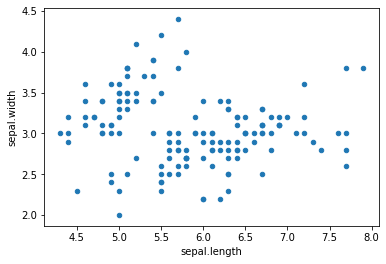

In [34]:
df.plot.scatter(x='sepal.length', y='sepal.width');

Net als bij de numpy oefeningen willen we nu een histogram van de sepal.length parameter. Bekijk daarvoor de volgende documentatie;

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

Waarschijnlijk krijg je een grafiek met alle histogrammen door elkaar.. als dit gebeurt bedenk dan hoe je wellicht eerst de selectie kunt maken en dan de histogram kunt plotten.

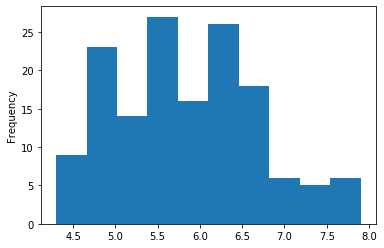

In [35]:
df['sepal.length'].plot.hist();

Om dan weer de complexere histogram plot te krijgen met 3 verschillende kleuren voor elke type zul je helaas terug moeten vallen op matplotlib. 

Schrijf code om op basis van je DataFrame de volgende plot te krijgen

![hist](img/irishist.png)

Wees niet gefrustreerd als dit niet direct lukt...

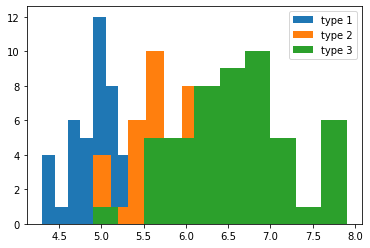

In [36]:
for t in [1,2,3]:
    plt.hist(df[df['variety']==t]['sepal.length'], label="type %d" % t)
plt.legend();

## Nog niet voldoende gedaan?

Maak dan eens een analyse van de data en daarmee een functie die op basis van een opgegeven sepal.length, sepal.width, petal.length, petal.width een voorspelling doet van het type (variety). 

De volgende code is een simplistische benadering van het probleem. We bepalen o.b.v. de beschikbare data de gemiddelden per parameter waarna we de som van het verschil tussen het gemiddelden en de opgegeven parameters bepalen. Het laagste verschil bepaalt het type. 

De code kan nog veel verder worden uitgebreid en wordt zoals geschreven vaak gebruikt voor de introductie voor machine learning dus voel je vrij om je verder te verdiepen.

Een paar tips;
* sklearn (machine learning bibliotheek) https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
* visualisatie https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
* tensorflow en iris, https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough

In [37]:
simplestats = {'slmean':[], 'swmean':[], 'plmean':[], 'pwmean':[]}
types = [1,2,3]

for t in types:
    selectie = df[df['variety']==t]
    simplestats['slmean'].append(selectie['sepal.length'].mean())
    simplestats['swmean'].append(selectie['sepal.width'].mean())
    simplestats['plmean'].append(selectie['petal.length'].mean())
    simplestats['pwmean'].append(selectie['petal.width'].mean())  
    
simplestats = pd.DataFrame(simplestats, index=types)


In [38]:
def predict(sl, sw, pl, pw):
    result = -1
    mindiff = 1e9
    for i in range(3):
        diff = df.iloc[i].values[:4] - [sl, sw, pl, pw]
        diff_tot = abs(np.sum(diff))
        if diff_tot < mindiff:
            result = i
            mindiff = diff_tot
            
    return result + 1      

In [39]:
predict(5, 3.3, 1.5, 0.3) #zou type 1 moeten opleveren

1